Joined_data.csv has data about tweeter id and how many tweets they made before harassment (0_x) and how many they made after harassment (0_y)

In [3]:
import pandas as pd
df = pd.read_csv("./joined_data.csv")

In [4]:
df.head()

Unnamed: 0  Tweeter ID  Before/After Harassment_x    0_x  \
0           0    15239674                        0.0  100.0   
1           1    17521339                        0.0   42.0   
2           2    18836491                        0.0   79.0   
3           3    19877186                        0.0  100.0   
4           4    23818597                        0.0  100.0   

   Before/After Harassment_y    0_y  
0                        1.0   99.0  
1                        1.0   24.0  
2                        1.0  100.0  
3                        1.0  100.0  
4                        1.0   96.0

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = df.drop(['Before/After Harassment_x', 'Before/After Harassment_y'], axis=1)

In [7]:
df = df.dropna()
df['Difference'] = ((df['0_y'] - df['0_x'])/df['0_x']) * 100
df

Unnamed: 0           Tweeter ID    0_x    0_y  Difference
0             0             15239674  100.0   99.0   -1.000000
1             1             17521339   42.0   24.0  -42.857143
2             2             18836491   79.0  100.0   26.582278
3             3             19877186  100.0  100.0    0.000000
4             4             23818597  100.0   96.0   -4.000000
..          ...                  ...    ...    ...         ...
130         130  1311376186514104320  100.0  100.0    0.000000
131         131  1312650354102882305   94.0   67.0  -28.723404
132         132  1321579494386200576  100.0  100.0    0.000000
133         133  1333042489457045506   32.0    1.0  -96.875000
134         134  1343715675999793153    7.0   26.0  271.428571

[133 rows x 5 columns]

The following graph is a scatter plot showing how many tweets were made before harassment (x axis) and how many tweets were made after harassment (y axis)

Text(0.5, 1.0, 'Change in Number of Tweets Made 1 Month Before and After Receving Harassment')

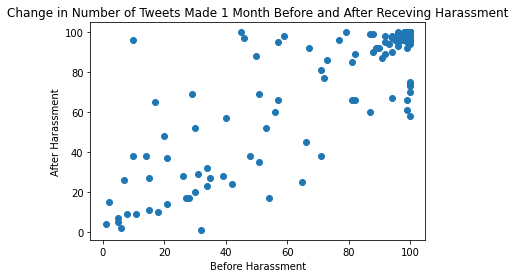

In [8]:
plt.scatter(df['0_x'], df['0_y'])
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")
plt.title("Change in Number of Tweets Made 1 Month Before and After Receving Harassment")

This graph is a histogram showing the counts of differences. (i.e. bins with how many users fall within that range)

(array([48., 74.,  5.,  3.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-96.875 ,  -1.1875,  94.5   , 190.1875, 285.875 , 381.5625,
        477.25  , 572.9375, 668.625 , 764.3125, 860.    ]),
 <BarContainer object of 10 artists>)

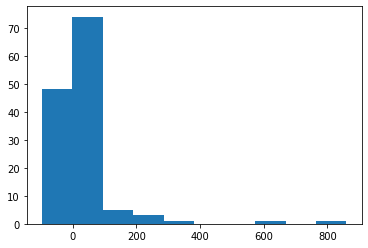

In [10]:
plt.hist(df['Difference'], density=False, bins=10)

Below is a simple count to see how many total users had no effect (i.e. no change in posting)

In [11]:
## Count to see total 0 effect users 
count = 0
for val in df['Difference'].values:
    if val == 0:
        count += 1
    
print(count)

22


So, we see that for most users harassment had some effect on their posting. For many, their number of tweets seemed to increase significantly. This is a bit strange. We will further explore these users and what kinds of posts they made in the month after they were harassed. 

We next explore which types of tweets they made: RTs, Replies, or General Posts

The data full_data.csv is generated based on the bash scripts I have written. Running those will create this file. When joining data, we can simple cat full_data.csv new_full_data.csv > full_data.csv

In [12]:
full_data = pd.read_csv("./full_data.csv", header = None)
full_data.head()

0                    1  \
0  2020-10-30T23:49:17.000Z  1322324726904180736   
1  2020-10-30T23:47:37.000Z  1322324307947696128   
2  2020-10-30T23:47:21.000Z  1322324242722115589   
3  2020-10-30T23:42:11.000Z  1322322943012200450   
4  2020-10-30T23:41:48.000Z  1322322845473607680   

                                                   2                    3  4  
0  @CharlieBewick5 Are you calling me bland and f...  1018986319786184704  0  
1                            @CharlieBewick5 Awww🥰🥰🥰  1018986319786184704  0  
2                               @CharlieBewick5 😽😽😽😽  1018986319786184704  0  
3                                 @CharlieBewick5 🤏🍆  1018986319786184704  0  
4                                 @CharlieBewick5 Oh  1018986319786184704  0

This snippet of code just identifies tweets as: replies (start with @), retweets (start with (RT), or Posts (none of previous). This would be better put in a function but for now this is fine.

In [14]:
tweet_type = []
for index, row in full_data.iterrows():
    if row[2][0] == '@':
        tweet_type.append('Reply')
        continue
    if row[2][0] == 'R' and row[2][1] == 'T':
        tweet_type.append('Retweet')
    else:
        tweet_type.append("Post")
        
full_data['Tweet Type'] = tweet_type

Counts df has the information about how many of each type of post was made before and after harassment by each user

In [15]:
counts = full_data.groupby([3, 'Tweet Type', 4]).size().reset_index(name="Total Count")
counts.head()

3 Tweet Type  4  Total Count
0  15239674       Post  0            8
1  15239674       Post  1           15
2  15239674      Reply  0           46
3  15239674      Reply  1           63
4  15239674    Retweet  0           46

In [16]:
before = counts[counts[4] == 0]
after = counts[counts[4] == 1]
result = pd.merge(before, after, how="inner", on=[3, 'Tweet Type'])

I first plot a scatterplot of "Post" type tweets (before and after harassment)

Text(0, 0.5, 'After Harassment')

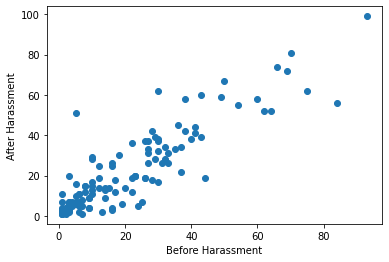

In [17]:
# Plot changes in Tweet Posts 
import matplotlib.pyplot as plt 

posts = result[result['Tweet Type'] == 'Post'] 
plt.scatter(x=posts['Total Count_x'], y=posts['Total Count_y'])
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")

/tmp/ipykernel_46206/188826959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts['Differences %'] = ((posts['Total Count_y'] - posts['Total Count_x'])/posts['Total Count_x'])*100


(array([0.00283401, 0.00448718, 0.00944669, 0.00425101, 0.00212551,
        0.00165317, 0.00047233, 0.00094467, 0.00023617, 0.        ,
        0.00023617, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00047233, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00023617, 0.        , 0.00023617]),
 array([ -85.71428571,  -49.52380952,  -13.33333333,   22.85714286,
          59.04761905,   95.23809524,  131.42857143,  167.61904762,
         203.80952381,  240.        ,  276.19047619,  312.38095238,
         348.57142857,  384.76190476,  420.95238095,  457.14285714,
         493.33333333,  529.52380952,  565.71428571,  601.9047619 ,
         638.0952381 ,  674.28571429,  710.47619048,  746.66666667,
         782.85714286,  819.04761905,  855.23809524,  891.42857143,
         927.61904762,  963.80952381, 1000.        ]),
 <BarContainer object of 30 artists>)

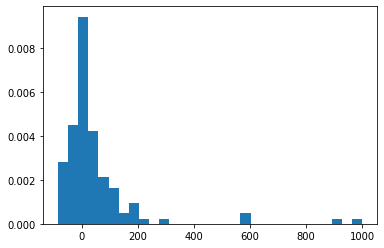

In [18]:
# Get differences for the Tweet Posts 
posts['Differences %'] = ((posts['Total Count_y'] - posts['Total Count_x'])/posts['Total Count_x'])*100
plt.hist(posts['Differences %'], density=True, bins=30)

Then, we do for replies. Scatterplot and histogram

Text(0, 0.5, 'After Harassment')

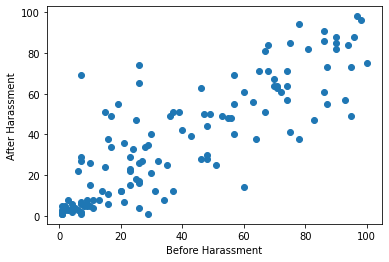

In [19]:
# Plot changes in Tweet Replies 
import matplotlib.pyplot as plt 

replies = result[result['Tweet Type'] == 'Reply'] 
plt.scatter(x=replies['Total Count_x'], y=replies['Total Count_y'])
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")

/tmp/ipykernel_46206/3282232309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies['Differences %'] = ((replies['Total Count_y'] - replies['Total Count_x'])/replies['Total Count_x'])*100


(array([0.00190885, 0.00644237, 0.01193032, 0.0038177 , 0.00190885,
        0.00047721, 0.00047721, 0.00095443, 0.00095443, 0.00023861,
        0.00023861, 0.00047721, 0.00023861, 0.        , 0.        ,
        0.00023861, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00023861]),
 array([-96.55172414, -63.80952381, -31.06732348,   1.67487685,
         34.41707718,  67.1592775 ,  99.90147783, 132.64367816,
        165.38587849, 198.12807882, 230.87027915, 263.61247947,
        296.3546798 , 329.09688013, 361.83908046, 394.58128079,
        427.32348112, 460.06568144, 492.80788177, 525.5500821 ,
        558.29228243, 591.03448276, 623.77668309, 656.51888342,
        689.26108374, 722.00328407, 754.7454844 , 787.48768473,
        820.22988506, 852.97208539, 885.71428571]),
 <BarContainer object of 30 artists>)

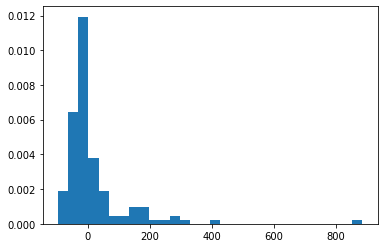

In [20]:
# Get differences for the Tweet Replies 
replies['Differences %'] = ((replies['Total Count_y'] - replies['Total Count_x'])/replies['Total Count_x'])*100
plt.hist(replies['Differences %'], density=True, bins=30)

Text(0, 0.5, 'After Harassment')

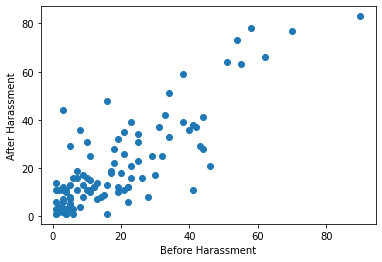

In [21]:
# Plot changes in Tweet Retweets 
import matplotlib.pyplot as plt 

rt = result[result['Tweet Type'] == 'Retweet'] 
plt.scatter(x=rt['Total Count_x'], y=rt['Total Count_y'])
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")

/tmp/ipykernel_46206/150254386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt['Differences %'] = ((rt['Total Count_y'] - rt['Total Count_x'])/rt['Total Count_x'])*100


(array([0.0029069 , 0.00697656, 0.00426345, 0.00232552, 0.00058138,
        0.00096897, 0.00058138, 0.00038759, 0.00019379, 0.00019379,
        0.        , 0.00038759, 0.00019379, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00019379, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00019379, 0.00019379]),
 array([ -93.75      ,  -45.06944444,    3.61111111,   52.29166667,
         100.97222222,  149.65277778,  198.33333333,  247.01388889,
         295.69444444,  344.375     ,  393.05555556,  441.73611111,
         490.41666667,  539.09722222,  587.77777778,  636.45833333,
         685.13888889,  733.81944444,  782.5       ,  831.18055556,
         879.86111111,  928.54166667,  977.22222222, 1025.90277778,
        1074.58333333, 1123.26388889, 1171.94444444, 1220.625     ,
        1269.30555556, 1317.98611111, 1366.66666667]),
 <BarContainer object of 30 artists>)

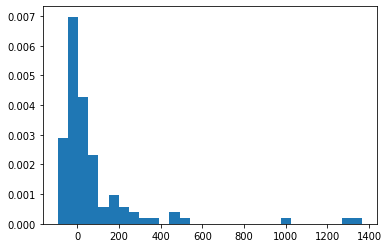

In [22]:
# Get differences for the Tweet Replies 
rt['Differences %'] = ((rt['Total Count_y'] - rt['Total Count_x'])/rt['Total Count_x'])*100
plt.hist(rt['Differences %'], density=True, bins=30)

We want to identify if there are any gaps in posting post harassment (but we need to compare this to their pre-harassment difference in post time average).

The code below is just to do this, we get the pre-harassment average time between posts. Then, I calculate the difference between first post made and harassment date and compare. I do a simple check: if new time difference is more than 2 times the previous average, I mark such users as "significantly affected"

In [275]:
from datetime import datetime 

def get_before_after_harassment_data(df):
    before = df[df[4] == 0]
    after = df[df[4] == 1]
    return before, after 

def get_pre_post_time_mean(before, user_id):
    user_tweets = before[before[3] == user_id]
    differences = []
    row_count = 0
    times = user_tweets[0].values
    times = sorted(times)
    for i in range(len(times) - 1):
        x = datetime.strptime(str(times[i]), '%Y-%m-%dT%H:%M:%S.%fZ') 
        y = datetime.strptime(str(times[i+1]), '%Y-%m-%dT%H:%M:%S.%fZ') 
        dif = y - x  
        differences.append(dif.total_seconds())
    try: 
        return sum(differences)/len(differences)
    except: 
        return 0 
    
def get_harassment_date(user_id):
    h_df = pd.read_csv("./harassment_dates.csv", header=None)
    date = h_df.loc[h_df[1] == user_id][2].values[0]
    return date
            
def get_post_post_time(after, user_id, harassment_date):
    try: 
        post_dates = after.loc[after[3] == user_id][0].values
        post_dates = sorted(post_dates)
        first_post_date = post_dates[0]
    except: 
        print("getting 0 post post time")
        return 0 
    h_d = datetime.strptime(str(harassment_date), '%Y-%m-%dT%H:%M:%S.%fZ')
    p_d = datetime.strptime(str(first_post_date), '%Y-%m-%dT%H:%M:%S.%fZ')
    return((p_d - h_d).total_seconds())
    
def difference_is_significant(avg, after_dif):
    ## just doing a simple check to see if the diff is more than 2.0 the avg 
    return ((avg*2.0) < after_dif)

def find_sig_users():        
    sig_users = []
    df = pd.read_csv("full_data.csv", header=None)
    before, after = get_before_after_harassment_data(df)
    users = before[3].unique()
    print(len(users))
    for user in users: 
        avg = get_pre_post_time_mean(before, user)
        try: 
            d = get_harassment_date(user)
        except: 
            print("missing user")
            continue  
        diff = get_post_post_time(after, user, d)
        if (difference_is_significant(avg, diff)):
            sig_users.append((avg, diff, user))
    return (sig_users)

In [278]:
sig_users = find_sig_users()
print(len(sig_users))

135
getting 0 post post time
getting 0 post post time
missing user
missing user
missing user
missing user
missing user
86


OK, so I ran the code from above. We find 5 missing users (not sure where their data is, basically we are missing their harassment details). 

But otherwise, we have 86 were "significantly affected" and there were another 2 users who did not post at all within the next month after receving harassment

In [279]:
### 5 missing users 
### 2 people never posted again within that month 
### xxxx user seems like didn't have much of an effect 
### rest 86 users had a big time gap between their posting 
print(sig_users)

[(11606.747474747475, 1380105.0, 1018986319786184704), (8165.226804123711, 1554432.0, 874100185013551104), (21825.555555555555, 466680.0, 203132018), (18612.946428571428, 373242.0, 1247397313703579648), (430.6060606060606, 1226329.0, 1311376186514104320), (113628.2, 241454.0, 871835882013306880), (10632.646464646465, 937987.0, 1221142580169265152), (169599.14285714287, 370444.0, 42977873), (16972.06818181818, 1994275.0, 881008079898374146), (20737.383838383837, 949010.0, 19877186), (31503.526315789473, 518180.0, 77873035), (1080.6938775510205, 1963252.0, 1006474869570093056), (6119.442105263158, 538328.0, 1110893469655056385), (2871.591836734694, 1815033.0, 1267500407925981184), (24542.617021276597, 1444947.0, 1094260940), (109859.95, 233324.0, 879820943648010240), (4413.0, 1119100.0, 1206138697982234629), (14084.958333333334, 348261.0, 1235238300509757441), (17295.48979591837, 722757.0, 305439331), (3125.131313131313, 1134992.0, 1119599138650324992), (15910.258426966293, 1004810.0, 43

In [297]:
### based on this, how many of these users started posting a lot more than they did after they took this break?
sig_user_ids = []
for sig_user in sig_users:
    sig_user_ids.append(sig_user[2])
    
df = pd.read_csv("full_data.csv", header=None)
before, after = get_before_after_harassment_data(df)
before_, after_ = [], []
for user in sig_user_ids:
    b = len(before[before[3] == user]) 
    try: 
        a = len(after[after[3] == user])
    except:
        a = 0
    before_.append(b)
    after_.append(a)
    print('Before: ' + str(b) + ' After: ' + str(a))

Before: 100 After: 98
Before: 98 After: 96
Before: 100 After: 96
Before: 57 After: 95
Before: 100 After: 100
Before: 6 After: 2
Before: 100 After: 96
Before: 15 After: 11
Before: 89 After: 92
Before: 100 After: 100
Before: 77 After: 96
Before: 99 After: 96
Before: 96 After: 99
Before: 99 After: 100
Before: 95 After: 96
Before: 21 After: 14
Before: 100 After: 100
Before: 97 After: 99
Before: 99 After: 100
Before: 100 After: 99
Before: 90 After: 92
Before: 93 After: 94
Before: 50 After: 88
Before: 100 After: 100
Before: 99 After: 100
Before: 100 After: 100
Before: 99 After: 99
Before: 32 After: 1
Before: 97 After: 98
Before: 51 After: 69
Before: 100 After: 100
Before: 98 After: 98
Before: 100 After: 96
Before: 99 After: 98
Before: 100 After: 100
Before: 99 After: 99
Before: 73 After: 86
Before: 100 After: 100
Before: 92 After: 95
Before: 87 After: 60
Before: 100 After: 100
Before: 96 After: 95
Before: 79 After: 100
Before: 100 After: 100
Before: 99 After: 96
Before: 34 After: 23
Before: 

I plot changes in the before and after harassment for these "significantly affected" users. But you can see there is not much correlation.

Text(0.5, 1.0, 'Change in Number of Tweets Made 1 Month Before and After Receving Harassment For Significant Users')

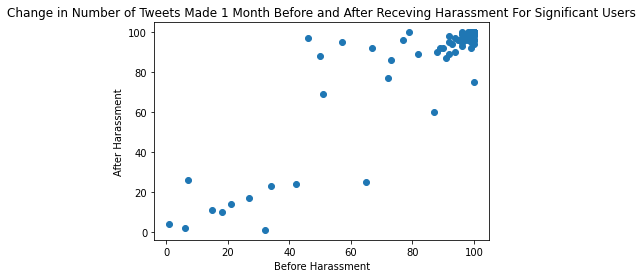

In [298]:
plt.scatter(before_, after_)
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")
plt.title("Change in Number of Tweets Made 1 Month Before and After Receving Harassment For Significant Users")

In [302]:
all_users = before[3].unique()
insig_users = []
for u in all_users:
    if u not in sig_user_ids:
        insig_users.append(u)

In [303]:
df = pd.read_csv("full_data.csv", header=None)
before, after = get_before_after_harassment_data(df)
before_, after_ = [], []
for user in insig_users:
    b = len(before[before[3] == user]) 
    try: 
        a = len(after[after[3] == user])
    except:
        a = 0
    before_.append(b)
    after_.append(a)
    print('Before: ' + str(b) + ' After: ' + str(a))

Before: 15 After: 27
Before: 40 After: 57
Before: 26 After: 28
Before: 29 After: 69
Before: 100 After: 96
Before: 56 After: 60
Before: 99 After: 66
Before: 82 After: 66
Before: 5 After: 7
Before: 21 After: 37
Before: 71 After: 81
Before: 80 After: 0
Before: 66 After: 45
Before: 30 After: 52
Before: 31 After: 29
Before: 94 After: 67
Before: 11 After: 9
Before: 39 After: 28
Before: 14 After: 38
Before: 100 After: 70
Before: 99 After: 61
Before: 17 After: 65
Before: 28 After: 17
Before: 45 After: 100
Before: 100 After: 73
Before: 87 After: 99
Before: 8 After: 9
Before: 54 After: 17
Before: 71 After: 38
Before: 20 After: 48
Before: 57 After: 66
Before: 35 After: 27
Before: 59 After: 98
Before: 100 After: 58
Before: 10 After: 96
Before: 81 After: 66
Before: 10 After: 38
Before: 88 After: 99
Before: 2 After: 15
Before: 81 After: 85
Before: 100 After: 74
Before: 34 After: 32
Before: 5 After: 0
Before: 53 After: 52
Before: 48 After: 38
Before: 5 After: 5
Before: 30 After: 20
Before: 51 After: 

I also do the same for the "insignificantly affected" (or perhaps not affected at all user). This is probably not a very useful plot but I have dont it anyway.

Text(0.5, 1.0, 'Change in Number of Tweets Made 1 Month Before and After Receving Harassment For In-Significant Users')

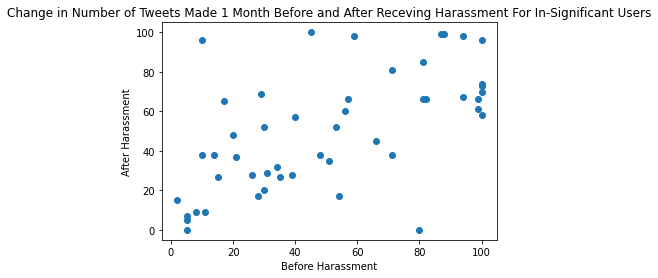

In [304]:
plt.scatter(before_, after_)
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")
plt.title("Change in Number of Tweets Made 1 Month Before and After Receving Harassment For In-Significant Users")

This shows mixed results, for some users they did not stop posting and made more posts (just had a break), could be unrelated to tweet (but further analysis of the tweets they posted is necessary). Others posted less. For the insig users, data is all over, so most likely the harassment message doesn't have any effect on them, maybe they didn't even see it